In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statistics as stats
import scipy.stats as sts

In [141]:
arr = 'C; E; B; B; C; E; E; F; F; A; F; D; E; B; E; A; B; F; E; F; E; E; NA; A; F; D; C; F; F; E; D; NA; C; E; E; D; D; A; B; F; C; E; D; C; B; C; D; NA; A; F; F; D; A; A; F; E; D; F; E; D; E; A; F; F; F; F; B; B; B; E; B; D; B; E; F; E; D; C; B; B; B; E; E; E; E; E; A; E; B; A; F; A; E; E; C; NA; E; C; D; E; B; A; E; A; A; E; F; E; C; NA; B; NA; F; D; B; C; F; F; A; E; E; F; E; A; NA; C; B; B; F; E; E; F; D; B; B; A; E; A; NA; NA; B; E; C; E; B; E; E; B; F; E; C; C; A; E; E; A; B; E; A; F; E; F; A; E; A; C; E; F; A; A; E; E; A; E; E; E; B; E; A; F; D; E; NA; NA; E; C; F; E; D; C; B; B; F; NA; F; NA; F; E; F; C; D; A; NA; B; A; B; C; F; F; E; NA; E; C; E; E; F; D; B; C; F; E; E; B; B; A; E; A; NA; E; A; A; E; B; B; D; C; B; E; E; D; A; D; D; A; B; D; A; D; F; D; C; B; E; NA; E; E; F; E; F; E; B; D; B; A; B; NA; NA; E; E; D; F; E; E; B; NA; E; E; C; D; E; A; B; E; B; D; F; D; F; B; B; NA; A; E; C; B; E; A; B; B; F; F; E; B; C; B; F; E; B; D; E; E; B; E; A; E; A; C; D; E; F'
data = arr.split('; ')
clean_data = [x for x in data if x != "NA"]
len(data), len(clean_data)

(320, 299)

In [142]:
# 1 количество различных вариантов ответов респондентов
categories, count, = np.unique(clean_data, return_counts=True)
len(categories)

6

In [143]:
# 2 объем очищенной от "NA" выборки
clean_data.count('B')+clean_data.count('E')+clean_data.count('A')+clean_data.count('C')+clean_data.count('D')+clean_data.count('F')

299

In [144]:
# 3 объем удаленных "NA" из выборки
len(data) - len(clean_data)

21

In [145]:
# 4 доля ответов "B" в очищенной выборке
clean_data.count('B')/len(clean_data)

0.1806020066889632

In [146]:
# 5 правая граница 0.9-доверительного интервала для истинной доли ответов  "B"
n = len(clean_data)      # объем очищенной выборки
x = clean_data.count('B')       # количество B

p_hat = x / n
z = stats.NormalDist().inv_cdf(0.95)   # для 0.9-ДИ

right = p_hat + z * math.sqrt(p_hat * (1 - p_hat) / n)
right


0.21719520728675948

In [147]:
# 6 правую границу 0.9-доверительного интервала для истинной доли ответов  "B"
left = p_hat - z * math.sqrt(p_hat * (1 - p_hat) / n)
left

0.14400880609116692

In [148]:
# ожидаемые частоты при равновероятном распределении
expected = [n / len(categories)] * len(categories)

# расчет статистики хи-квадрат
chi2_stat = sum((o - e)**2 / e for o, e in zip(count, expected))

# степени свободы
df = len(categories) - 1

# p-значение
p_value = 1 - sts.chi2.cdf(chi2_stat, df)

# проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отвергаем H0: распределение не равновероятно")
else:
    print("Не отвергаем H0: распределение может быть равновероятным")

Отвергаем H0: распределение не равновероятно


In [149]:
# 7 критическое значение статистики хи-квадрат
chi2_crit = sts.chi2.ppf(1 - alpha, df)
chi2_crit

np.float64(11.070497693516351)

In [150]:
# 8 количество степеней свободы 
df = len(categories) - 1

In [151]:
# 9 наблюдаемое значение хи-квадрат
chi2_stat = sum((o - e)**2 / e for o, e in zip(count, expected))
chi2_stat

np.float64(49.98327759197325)

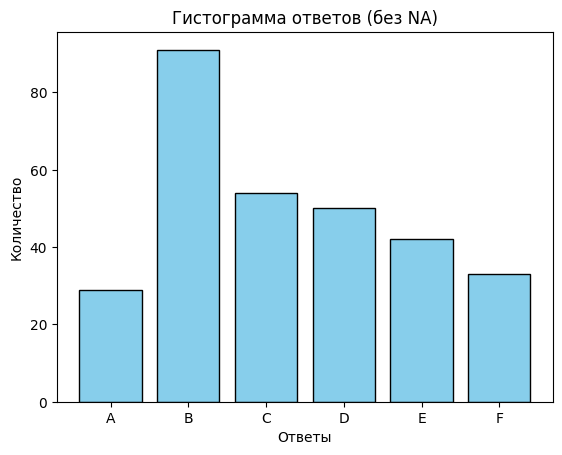

In [152]:
plt.hist(clean_data, bins=range(7), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(6), ["A","B","C","D","E","F"])
plt.xlabel("Ответы")
plt.ylabel("Количество")
plt.title("Гистограмма ответов (без NA)")
plt.show()

In [153]:
data_str = "(229.8913, -249.005); (211.175, -242.3026); (239.9287, NA); (192.9053, -229.2418); (250.8391, -236.5777); (226.5438, NA); (256.6088, -226.5042); (264.2886, -258.8159); (260.3768, -214.0062); (212.7603, -277.242); (228.5655, -244.0953); (229.9266, -216.5249); (242.6244, -190.7511); (214.0534, -245.3918); (245.0365, -226.873); (239.1903, -236.8646); (NA, -210.7305); (254.1441, -233.879); (220.5622, -250.1271); (230.242, -219.9787); (263.1507, -236.4942); (200.2965, -244.956); (258.1586, -219.0508); (245.6904, -237.4635); (239.9981, -247.3473); (216.2959, -224.3308); (253.2336, -235.0616); (206.6878, -255.3988); (277.859, -249.7931); (224.7733, -231.0897); (217.5847, -251.4545); (243.4681, -221.5325); (221.0567, -181.4968); (267.9793, -239.3047); (207.9601, -264.8547); (NA, -215.2892); (221.9349, -282.3015); (218.0914, -263.2075); (235.001, -243.0476); (225.7293, NA); (248.8858, -256.8433); (254.7993, -200.2354); (261.5447, -240.2966); (277.5256, -199.0265); (230.2718, -212.5038); (251.7518, -243.8285); (242.7702, NA); (224.963, -244.0319); (263.9771, -211.0271); (238.4354, -206.8493); (261.0131, -221.2944); (257.6748, -229.0565); (263.1095, -273.7399); (251.2129, -244.4294); (228.3978, -221.6423); (247.0481, -259.1313); (230.9267, -238.0251); (NA, -212.9542); (242.4469, -251.1543); (NA, -228.3898); (254.6473, -235.5847); (207.6988, -253.0553); (249.6321, -202.1042); (222.3143, -199.9885); (230.5236, NA); (206.2649, -199.5468); (NA, -217.2843); (NA, -203.0754); (249.6889, -244.6592); (207.2507, -189.8267); (246.4927, -261.646); (255.933, -220.3721); (NA, -231.7617); (269.167, -215.5054); (281.1411, -251.9728); (262.971, -217.3156); (213.0184, -246.1183); (248.8408, -253.6779); (289.8699, -227.9787); (210.3555, -261.0687); (257.7143, -270.7705); (NA, -233.6102); (272.2594, -239.8614); (NA, -236.6536); (245.9683, -263.9436); (269.1481, -238.8185); (227.5575, -240.0729); (271.7998, -184.2273); (223.2847, -239.6393); (NA, -237.9262); (191.7213, -205.9527); (256.8633, -233.9238); (283.3075, -242.7194); (249.04, -228.7788); (266.1332, -237.5); (198.1345, -212.5946); (252.5083, -298.1446); (263.8426, -286.0458); (249.104, -241.8335); (254.5814, -222.7285); (254.6083, -227.5318); (239.7562, -277.7334); (270.5014, -210.0512); (262.948, -223.4826); (229.0076, -245.1416); (245.235, -235.2998); (212.0372, -264.5941); (NA, -253.7327); (281.3536, -235.8336); (255.2127, -213.1962); (246.9911, -262.3318); (218.3325, -254.6386); (186.6908, -248.3131); (238.7545, -240.8932); (253.756, -251.9187); (213.646, -264.7071); (217.3975, -273.7448); (279.3851, -215.9492); (224.7863, -209.2412); (210.1352, -248.4717); (223.8941, NA); (231.8981, NA); (227.2725, -238.9615); (252.5325, -272.9618); (NA, -198.2284); (220.8794, NA); (213.4435, -269.7891); (245.3018, -233.1422); (267.4252, -246.9632); (225.694, -226.4684); (221.0693, -274.9554); (237.1003, -244.16); (259.1797, NA); (235.3299, -252.0056); (250.4069, NA); (257.3451, -276.8222); (239.5995, -195.2333); (217.4422, -275.3482); (252.3082, -233.0116); (229.4388, -263.324); (250.1025, -202.9603); (227.7197, NA); (236.8862, -209.0275); (267.8604, -233.5799); (204.3212, -223.6395); (272.2307, NA); (242.0994, -242.7696); (229.241, -241.2662); (253.4691, -210.4279); (277.1636, -232.9422)"

items = data_str.split(";")

A = []
B = []

for item in items:
    item = item.strip()
    item = item.strip("()")
    x_str, y_str = map(str.strip, item.split(","))
    
    x = x_str if x_str == "NA" else float(x_str)
    y = y_str if y_str == "NA" else float(y_str)
    
    A.append(x)
    B.append(y)
print(f"Количество наблюдений: {len(A)}")

for i in range(5):
    print(A[i], B[i])


Количество наблюдений: 150
229.8913 -249.005
211.175 -242.3026
239.9287 NA
192.9053 -229.2418
250.8391 -236.5777


In [154]:
clean_A = []
clean_B = []

for a, b in zip(A, B):
    if a != 'NA' and b != 'NA':  # оставляем только полные наблюдения
        clean_A.append(a)
        clean_B.append(b)

print(f"Количество полных наблюдений: {len(clean_A)}")
for i in range(5):
    print(clean_A[i], clean_B[i])

Количество полных наблюдений: 126
229.8913 -249.005
211.175 -242.3026
192.9053 -229.2418
250.8391 -236.5777
256.6088 -226.5042


In [155]:
# 1 выборочный коэффициент корреляции Пирсона между X и Y

mean_X = sum(clean_A) / len(clean_A)
mean_Y = sum(clean_B) / len(clean_B)

# Числитель и знаменатель
numerator = sum((x - mean_X)*(y - mean_Y) for x, y in zip(clean_A, clean_B))
denominator = math.sqrt(sum((x - mean_X)**2 for x in clean_A) * sum((y - mean_Y)**2 for y in clean_B))

r = numerator / denominator

r


0.11839889823212554

In [156]:
# 2.1 Введите значение P-value в проверке гипотезы о равенстве средних значений показателей фирм при альтернативной гипотезе об их неравенстве (без каких-либо предположений о равенстве дисперсий)

t_stat, p_value = sts.ttest_ind(clean_A, clean_B, equal_var=False)

p_value

np.float64(4.213919241609298e-258)

In [157]:
# 2.2 На уровне значимости 0.1 можно ли утверждать, что средние значения показателей у фирм различны? Введите 1 - если да, и 0 - если нет
p_value < 0.1
# ответ 1

np.True_

In [158]:
# 3.1 Введите значение P-value в проверке гипотезы о равенстве дисперсий показателей двух фирм при альтернативной гипотезе о том, что дисперсия показателя больше у второй фирмы 

var_X = sum((x - sum(clean_A)/len(clean_A))**2 for x in clean_A) / (len(clean_A)-1)
var_Y = sum((y - sum(clean_B)/len(clean_B))**2 for y in clean_B) / (len(clean_B)-1)

F = var_Y / var_X  # т.к. альтернативная: sigma_Y^2 > sigma_X^2
df1 = len(clean_B) - 1
df2 = len(clean_A) - 1

# P-value для одностороннего F-теста
p_value = 1 - sts.f.cdf(F, df1, df2)

p_value

np.float64(0.40889949834930583)

In [159]:
# 3.2 На уровне значимости 0.1 можно ли утверждать, что о том, что дисперсия показателя больше у второй фирмы? Введите 1 - если да, и 0 - если нет
p_value > 0.1
# ответ 1

np.True_